In [2]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy.stats as st

In [3]:
file = "country_case_df.csv"


# Read df into pandas.
question_10_df = pd.read_csv(file)
question_10_df.head()

,Unnamed: 0,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [4]:
question_10_df.rename(columns={"deaths":"Deaths", "country":"Country", "life_expectancy":"Life Expectancy"}, inplace = True)

In [5]:
question_10_df.head()

,Unnamed: 0,Country,confirmed,Deaths,population,sq_km_area,Life Expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [6]:
question_10_df.dtypes

Unnamed: 0                  int64
Country                    object
confirmed                   int64
Deaths                      int64
population                  int64
sq_km_area                float64
Life Expectancy           float64
elevation_in_meters        object
continent                  object
abbreviation               object
location                   object
iso                       float64
capital_city               object
percentage_confirmed_%    float64
percentage_deaths_%       float64
dtype: object

In [7]:
condensed_question_10_df = question_10_df.groupby(["Country","Life Expectancy"]).sum()[["Deaths"]]
condensed_question_10_df.head()

,,Deaths
Country,Life Expectancy,
Afghanistan,45.9,6804
Albania,71.6,2457
Algeria,69.7,4370
Andorra,83.5,128
Angola,38.3,1022


In [8]:
confirmed_deaths_to_expectancy_df = condensed_question_10_df.sort_values(by='Deaths', ascending = False)
confirmed_deaths_to_expectancy_df

,,Deaths
Country,Life Expectancy,
US,77.1,614295
Brazil,62.9,558432
India,62.5,425195
Mexico,71.5,241936
Peru,70.0,196598
...,...,...
Samoa,69.2,0
Palau,68.6,0
Dominica,73.4,0


In [9]:
confirmed_deaths_to_expectancy_df['Natural log of Deaths'] = np.log(confirmed_deaths_to_expectancy_df['Deaths'])
confirmed_deaths_to_expectancy_df

/Users/Max/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,,Deaths,Natural log of Deaths
Country,Life Expectancy,,
US,77.1,614295,13.328231
Brazil,62.9,558432,13.232888
India,62.5,425195,12.960303
Mexico,71.5,241936,12.396429
Peru,70.0,196598,12.188916
...,...,...,...
Samoa,69.2,0,-inf
Palau,68.6,0,-inf
Dominica,73.4,0,-inf


In [10]:
confirmed_deaths_to_expectancy_df.columns

Index(['Deaths', 'Natural log of Deaths'], dtype='object')

In [11]:
confirmed_deaths_to_expectancy_df.reset_index(inplace=True)

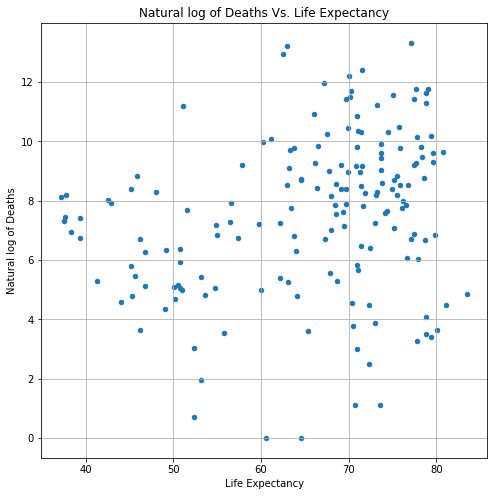

In [12]:
confirmed_deaths_to_expectancy_df.plot(kind="scatter", x="Life Expectancy", y="Natural log of Deaths", grid=True, figsize=(8,8), title="Natural log of Deaths Vs. Life Expectancy")
plt.show()

In [18]:
question_10_df.dropna(inplace=True)

The r-squared is: 0.18639604652060562


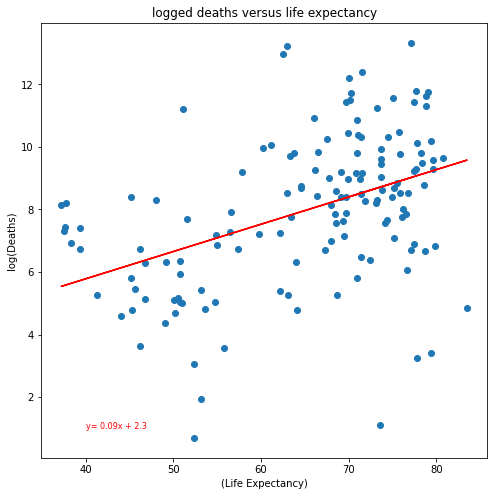

In [20]:
plt.rcParams['figure.figsize'] = [8, 8]
x_values = question_10_df['Life Expectancy']
y_values = np.log(question_10_df['Deaths'])
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_1 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_1,(40,1),fontsize =8, color='red')
plt.xlabel('(Life Expectancy)')
plt.ylabel('log(Deaths)')
plt.title('logged deaths versus life expectancy')
print(f'The r-squared is: {rvalue ** 2}')
plt.show()